In [71]:
%matplotlib inline
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, color, transform
import tensorflow as tf
import numpy as np
import os
from pathlib import Path
from sklearn.model_selection import train_test_split

# Exploratory analysis

In [2]:
#Read in filepaths
bed_filenames = glob("dataset/Bed/*.jpg")
chair_filenames = glob("dataset/Chair/*.jpg")
sofa_filenames = glob("dataset/Sofa/*.jpg")

In [3]:
#Check for image types other than RGB
for file in bed_filenames:
    image = Image.open(file)
    if image.mode != "RGB":
        print(image.mode)

for file in chair_filenames:
    image = Image.open(file)
    if image.mode != "RGB":
        print(image.mode)        

for file in sofa_filenames:
    image = Image.open(file)
    if image.mode != "RGB":
        print(image.mode)

# Rearranging Files

In [82]:
labels_bed = ["bed"] * 100
X_training_set_bed, X_testing_set_bed_, y_training_bed, y_testing_bed_ = train_test_split(bed_filenames, 
                                                                                       labels_bed, 
                                                                                       test_size=0.3,
                                                                                       random_state=42)
X_testing_set_bed, X_validation_set_bed, y_testing_bed, y_validation_bed = train_test_split(X_testing_set_bed_, 
                                                                                       y_testing_bed_, 
                                                                                       test_size=0.3,
                                                                                       random_state=42)


In [83]:
training_dir = "dataset2/train/Bed\\"

for filename in X_training_set_bed:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = training_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)
    
testing_dir = "dataset2/test/Bed\\"

for filename in X_testing_set_bed:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = testing_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)

validation_dir = "dataset2/validate/Bed\\"

for filename in X_validation_set_bed:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = validation_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)      

In [84]:
labels_chair = ["chair"] * 100
X_training_set_chair, X_testing_set_chair_, y_training_chair, y_testing_chair_ = train_test_split(chair_filenames, 
                                                                                       labels_chair, 
                                                                                       test_size=0.3,
                                                                                       random_state=42)
X_testing_set_chair, X_validation_set_chair, y_testing_chair, y_validation_chair = train_test_split(X_testing_set_chair_, 
                                                                                       y_testing_chair_, 
                                                                                       test_size=0.3,
                                                                                       random_state=42)

In [85]:
training_dir = "dataset2/train/Chair\\"

for filename in X_training_set_chair:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = training_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)
    
testing_dir = "dataset2/test/Chair\\"

for filename in X_testing_set_chair:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = testing_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)

validation_dir = "dataset2/validate/Chair\\"

for filename in X_validation_set_chair:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = validation_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)      

In [86]:
labels_sofa = ["sofa"] * 100
X_training_set_sofa, X_testing_set_sofa_, y_training_bed, y_testing_bed_ = train_test_split(sofa_filenames, 
                                                                                       labels_sofa, 
                                                                                       test_size=0.3,
                                                                                       random_state=42)
X_testing_set_sofa, X_validation_set_sofa, y_testing_sofa, y_validation_sofa = train_test_split(X_testing_set_sofa_, 
                                                                                       y_testing_bed_, 
                                                                                       test_size=0.3,
                                                                                       random_state=42)

In [87]:
training_dir = "dataset2/train/Sofa\\"

for filename in X_training_set_sofa:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = training_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)
    
testing_dir = "dataset2/test/Sofa\\"

for filename in X_testing_set_sofa:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = testing_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)

validation_dir = "dataset2/validate/Sofa\\"

for filename in X_validation_set_sofa:
    nameIndex = filename.rfind('\\') # used for saving file names
    im_name = filename[nameIndex+1:]
    save_path = validation_dir + im_name
    im = io.imread(filename)
    io.imsave(save_path,im)      

# Generators

In [18]:
BATCH_SIZE = 20
N_CLASSES = 3
TOTAL_EPOCHS = 100

In [19]:
#Generators
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_batches = train_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory="dataset2/train",
    target_size=[224, 224],
    class_mode='categorical'
)

val_batches = train_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory="dataset2/test/",
    target_size=[224, 224],
    class_mode='categorical'
)

Found 211 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


# Model

In [20]:
kernel_initializer = tf.keras.initializers.glorot_uniform(seed=1337)
trained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
                      include_top=False,
                      weights='imagenet',
                      alpha=0.5,
                      input_shape=[224, 224, 3],
                      pooling='max')
output = tf.keras.layers.Dense(N_CLASSES, activation='softmax', kernel_initializer=kernel_initializer)(trained_model.output)
model = tf.keras.Model(inputs=trained_model.input, outputs=output)

In [25]:
# Callback to save weights, based on val_acc
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  './checkpoints/{epoch:02d}_{val_accuracy:.4f}.h5',
  save_weights_only=False,
  verbose=1,
  monitor='val_accuracy',
  save_best_only=True,
  mode='max'
)

# Callbackto plot data on TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(
  log_dir='./logs/furniture_classifier',
  histogram_freq=0,
  batch_size=BATCH_SIZE
)

reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
  monitor='val_accuracy',
  factor=0.5,
  patience=4,
  min_lr=1e-6
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_accuracy',
  patience=20,
  mode='max',
)

TRAIN_DATASET_SIZE = len(train_batches)
VAL_DATASET_SIZE   = len(val_batches)

# Weighted losses for class equilibrium
unique, counts = np.unique(train_batches.classes, return_counts=True)
class_weigths = dict(zip(unique, np.true_divide(counts.sum(), N_CLASSES*counts)))

In [26]:
if Path('./checkpoints/').exists():
    epoch_number_array = []
    val_accuracy_array = []
    file_name_array = []
    for file in os.listdir('./checkpoints/'):
        epoch, val_acc = re.search(r'(\d\d)_(\d\.\d{4})\.h5', file).group(1,2)
        epoch_number_array.append(int(epoch))
        val_accuracy_array.append(float(val_acc))
        file_name_array.append(file)

    if len(val_accuracy_array) == 0:
        INITIAL_EPOCH = 0
    else:
        highest_acc = val_accuracy_array.index(max(val_accuracy_array))
        INITIAL_EPOCH = epoch_number_array[highest_acc]
        model_checkpoint_callback.best = val_accuracy_array[highest_acc]
        model.load_weights('./checkpoints/'+file_name_array[highest_acc])
else:
    os.makedirs('./checkpoints/')
    INITIAL_EPOCH = 0

In [27]:
# Prepare model to run
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [28]:
# Starts training the model
model.fit(train_batches,
                    epochs=TOTAL_EPOCHS,
                    verbose=2,
                    steps_per_epoch=TRAIN_DATASET_SIZE,
                    validation_data=val_batches,
                    validation_steps=VAL_DATASET_SIZE,
                    initial_epoch=INITIAL_EPOCH,
                    class_weight=class_weigths,
                    callbacks=[model_checkpoint_callback, tensorboard_callback, reduce_lr_callback, early_stopping_callback]
                    )

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.55556, saving model to ./checkpoints\01_0.5556.h5
11/11 - 36s - loss: 1.6233 - accuracy: 0.8104 - val_loss: 4.4317 - val_accuracy: 0.5556 - lr: 0.0010 - 36s/epoch - 3s/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.55556
11/11 - 18s - loss: 1.2441 - accuracy: 0.8057 - val_loss: 4.6558 - val_accuracy: 0.3968 - lr: 0.0010 - 18s/epoch - 2s/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.55556
11/11 - 17s - loss: 0.6802 - accuracy: 0.9194 - val_loss: 8.9222 - val_accuracy: 0.3651 - lr: 0.0010 - 17s/epoch - 2s/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.55556
11/11 - 17s - loss: 0.5531 - accuracy: 0.9100 - val_loss: 4.8013 - val_accuracy: 0.4921 - lr: 0.0010 - 17s/epoch - 2s/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.55556
11/11 - 17s - loss: 0.4314 - accuracy: 0.9336 - val_loss: 6.8588 - val_accuracy: 0.4286 - lr: 0.0010 - 17s/epoch - 2s/step
Epoch 6/100

Epoch 6

Epoch 42/100

Epoch 42: val_accuracy did not improve from 0.90476
11/11 - 17s - loss: 0.0182 - accuracy: 0.9905 - val_loss: 1.1228 - val_accuracy: 0.8571 - lr: 1.5625e-05 - 17s/epoch - 2s/step
Epoch 43/100

Epoch 43: val_accuracy improved from 0.90476 to 0.92063, saving model to ./checkpoints\43_0.9206.h5
11/11 - 17s - loss: 0.0532 - accuracy: 0.9905 - val_loss: 0.5052 - val_accuracy: 0.9206 - lr: 1.5625e-05 - 17s/epoch - 2s/step
Epoch 44/100

Epoch 44: val_accuracy did not improve from 0.92063
11/11 - 18s - loss: 0.0355 - accuracy: 0.9810 - val_loss: 0.4271 - val_accuracy: 0.8730 - lr: 1.5625e-05 - 18s/epoch - 2s/step
Epoch 45/100

Epoch 45: val_accuracy did not improve from 0.92063
11/11 - 17s - loss: 0.0681 - accuracy: 0.9858 - val_loss: 0.7149 - val_accuracy: 0.8730 - lr: 1.5625e-05 - 17s/epoch - 2s/step
Epoch 46/100

Epoch 46: val_accuracy did not improve from 0.92063
11/11 - 17s - loss: 0.0577 - accuracy: 0.9858 - val_loss: 0.8953 - val_accuracy: 0.8730 - lr: 1.5625e-05 - 17s/epo

# Model Evaluation

1/1 [==============================] - 0s 30ms/step


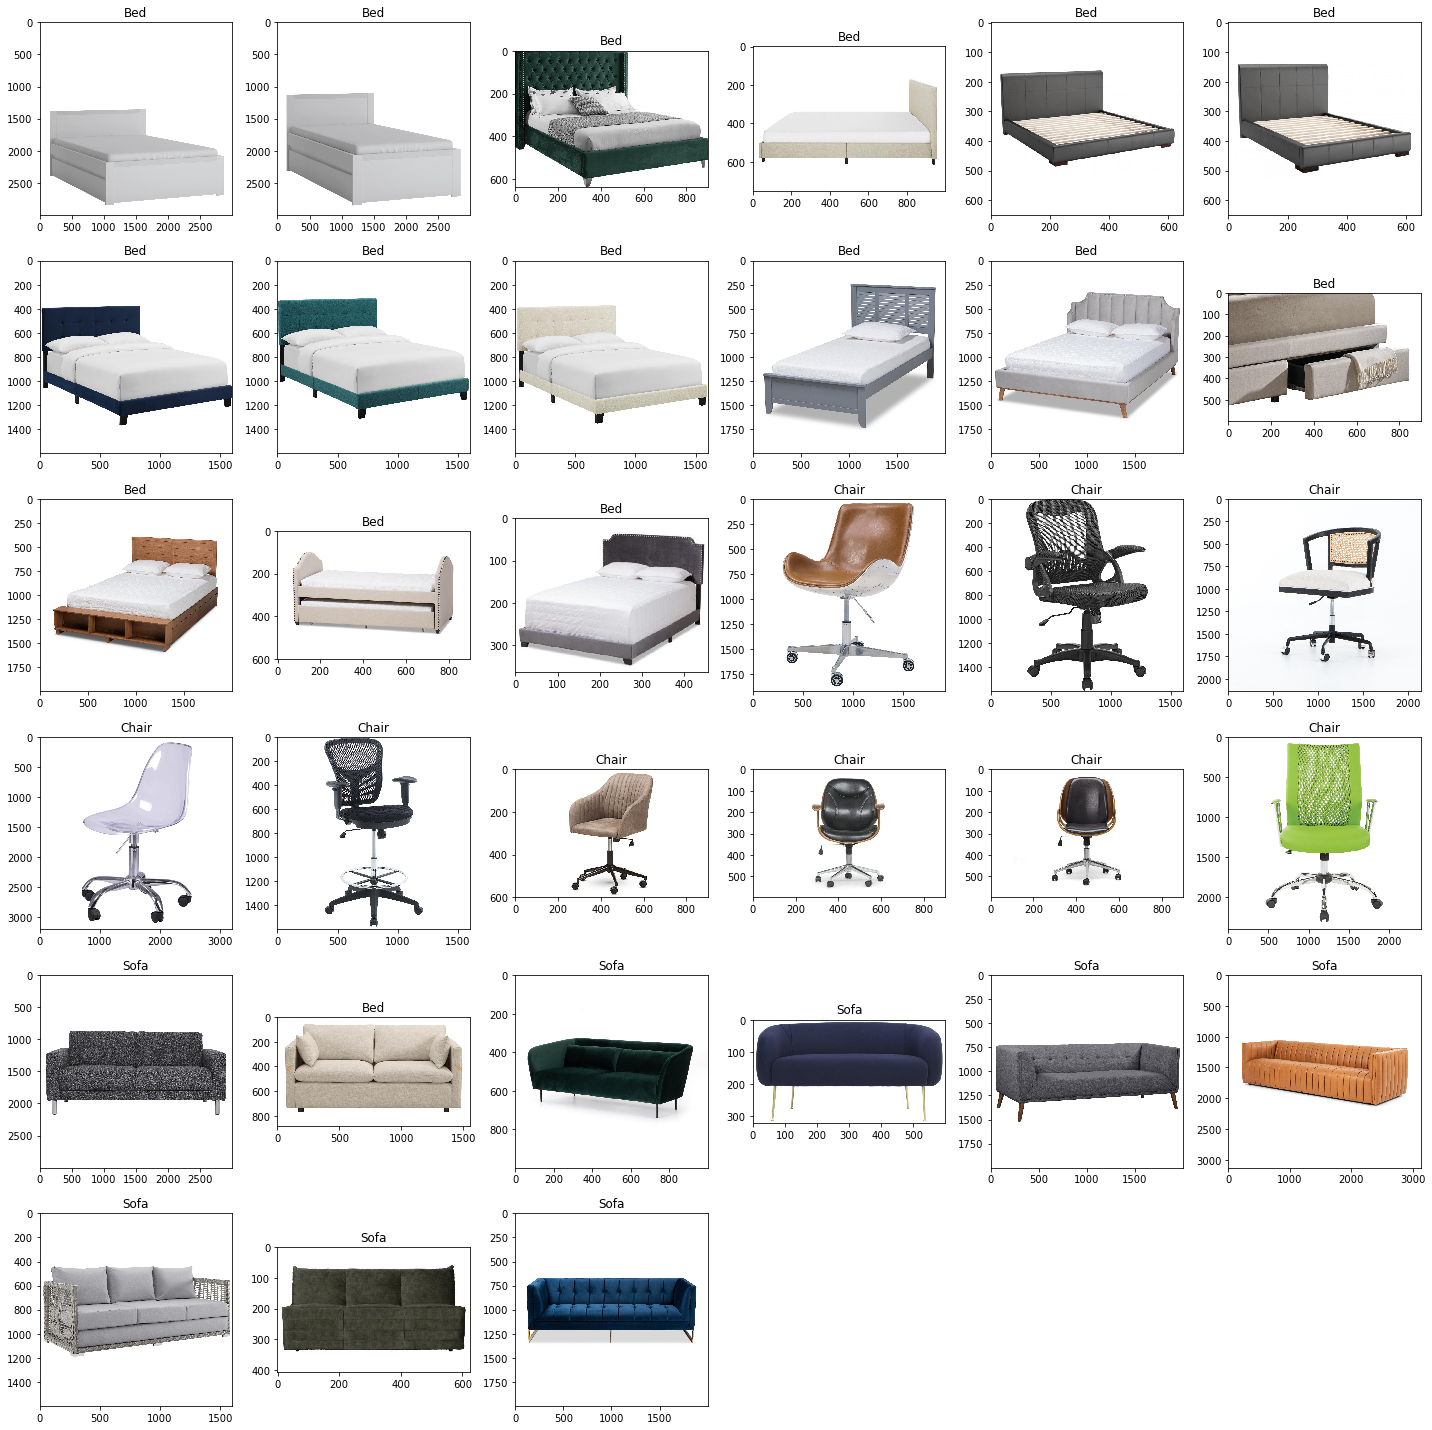

In [83]:
plt.figure(figsize=(20,20))
labels = ['Bed', 'Chair', 'Sofa']
validation_files = glob("dataset2/validate/*/*.jpg")
for fileCounter in range(len(validation_files)):
    im = io.imread(validation_files[fileCounter])
    plt.subplot(6,6,fileCounter+1)
    plt.gca().set_title(labels[np.argmax(model.predict(tf.expand_dims(transform.resize(im,(224,224)),axis=0)))])
    io.imshow(im)

In [80]:
im = io.imread("dataset2/validate/Bed/ALBI BED.jpg")
temp = transform.resize(im,(224,224))
print(labels[np.argmax(model.predict(tf.expand_dims(temp,axis=0)))])

1/1 [==============================] - 0s 32ms/step
Bed


In [77]:
labels = ['Bed', 'Chair', 'Sofa']

In [ ]:
np.argmax()